In [1]:
from stella import YoungStars
import os
import pandas as pd
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.stats import sigma_clip
from astropy import constants as c
from astropy import units as u

import matplotlib.gridspec as gridspec

from astropy.table import Table, Column
from astropy.io import ascii

import exoplanet as xo

plt.rcParams['font.size'] = 15

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
directory = '/Users/AdinaFeinstein/Documents/young_stars'
files = [i for i in os.listdir(directory) if 'hlsp' in i]

In [3]:
tics, groups=[],[]
for fn in files:
    f = fn.split('tic')[1]
    tic = f.split('_')[0]
    tics.append(tic)
tics = np.unique(tics)
for t in tics:
    subset = [i for i in files if str(t) in i]
    groups.append(subset)

In [5]:
f = pd.DataFrame()

for i, g in enumerate(groups):
    try:
        ys = YoungStars(fn=g, fn_dir=directory)
        ys.savitsky_golay()
        ys.identify_flares(method="savitsky-golay")

        ys.flares['plx']  = ys.plx
        ys.flares['Teff'] = ys.teff
        ys.flares['Age']  = ys.age
        ys.flares['Prot'] = ys.p_rot
        ys.flares['Jmag'] = ys.jmag
        ys.flares['Hmag'] = ys.hmag
        ys.flares['Kmag'] = ys.kmag
        ys.flares['Bmag'] = ys.gaia_bp
        ys.flares['Rmag'] = ys.gaia_rp
        ys.flares['e_Jmag'] = ys.jmag_err
        ys.flares['e_Hmag'] = ys.hmag_err
        ys.flares['e_Kmag'] = ys.kmag_err
        ys.flares['e_Bmag'] = ys.gaia_bp_err
        ys.flares['e_Rmag'] = ys.gaia_rp_err
        
        ys.flares['Teff'] = ys.teff
        ys.flares['lum']  = ys.lum
        ys.flares['e_Teff'] = ys.e_teff
        ys.flares['e_lum']  = ys.e_lum
        
        ys.flares['cadences'] = len(ys.time)
        ys.flares['LS_power'] = ys.LS_power[np.argmax(ys.LS_power)]

        if ys.multi is True:
            ys.flares['TIC'] = ys.star[0].tic
            ys.flares['RA']  = ys.star[0].coords[0]
            ys.flares['Dec'] = ys.star[0].coords[1]
        else:
            ys.flares['TIC'] = ys.star.tic
            ys.flares['RA']  = ys.star.coords[0]
            ys.flares['Dec'] = ys.star.coords[1]

        if i == 0:
            f = ys.flares
        else:
            f = f.append(ys.flares)
    except:
        print(g)
        pass
    
for i in range(len(f['TIC'])):
    row = f.iloc[i]
    ed_rec = row['ed_rec'] * u.s
    lumino = row['lum'] * c.L_sun
    energy = (ed_rec * lumino).to(u.erg)
    flare_energy.append(energy.value)
flare_energy=np.array(flare_energy) 

f['E_flare'] = flare_energy

f.to_csv('flare_parameters.csv')

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

['hlsp_eleanor_tess_ffi_tic146539195_s05_tess_v0.2.0_lc.fits']


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


['hlsp_eleanor_tess_ffi_tic201814502_s02_tess_v0.2.0_lc.fits']


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

['hlsp_eleanor_tess_ffi_tic441420236_s01_tess_v0.2.0_lc.fits']


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

['hlsp_eleanor_tess_ffi_tic842138729_s08_tess_v0.2.0_lc.fits']


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sor

In [4]:
f = pd.read_csv('flare_parameters.csv')

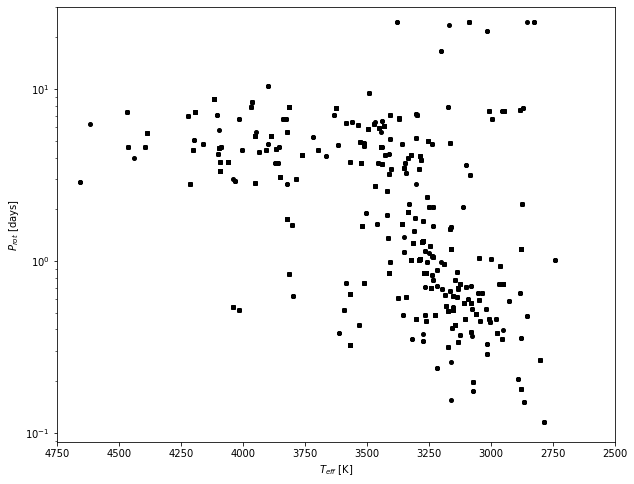

In [5]:
plt.figure(figsize=(10,8))
plt.plot(f['Teff'], f['Prot'], 'ko', ms=4)
plt.xlim(4750, 2500)
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('$P_{rot}$ [days]')
plt.yscale('log')
plt.ylim(0,30)
plt.show()
#plt.savefig('temp_rotation.png', bbox_inches='tight', dpi=200)

# FlArE eNeRgIeS

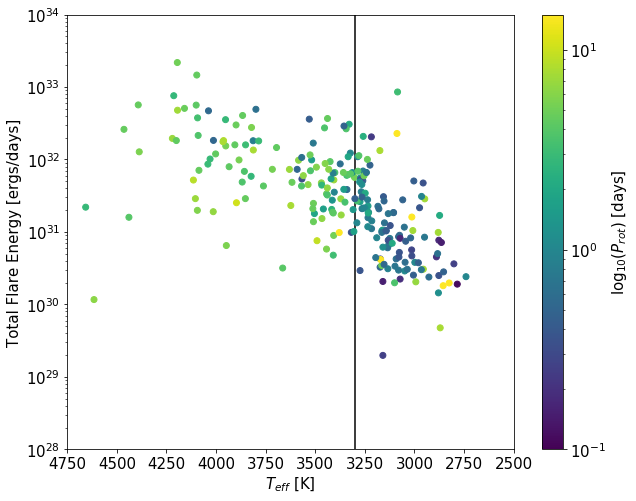

In [6]:
%matplotlib inline
plt.rcParams['font.size'] = 15
plt.figure(figsize=(10,8))

teff, tot_e, rot, nflares, cads = [], [], [], [], []
for t in np.unique(f['TIC']):
    subset = f[f['TIC'] == t]
    teff.append(subset.iloc[0]['Teff'])
    rot.append(subset.iloc[0]['Prot'])
    tot_e.append(np.sum(subset['E_flare'].values))
    cads.append(subset.iloc[0]['cadences'])
    nflares.append(len(subset))

plt.scatter(teff, np.array(tot_e)/np.array(cads), 
            c=rot,
            norm=mpl.colors.LogNorm(), vmin=0.1, vmax=15)
plt.colorbar(label='log$_{10} (P_{rot})$ [days]')
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('Total Flare Energy [ergs/days]')
plt.vlines(3300, 1e20, 1e40, 'k', zorder=0)
plt.yscale('log')
plt.ylim(1e28,1e34)
plt.xlim(4750, 2500)
plt.show()
#plt.savefig('total_flares.png', bbox_inches='tight', dpi=250)

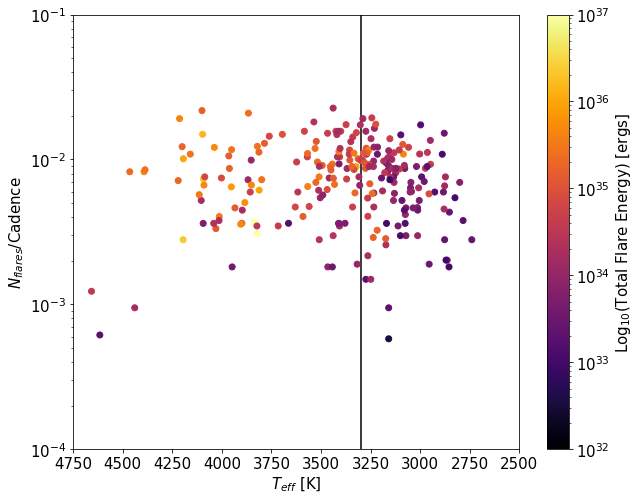

In [7]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(10,8))

plt.scatter(teff, np.array(nflares)/np.array(cads), 
            c=tot_e,
            norm=mpl.colors.LogNorm(), vmin=1e32, vmax=1e37, cmap='inferno')
plt.colorbar(label='Log$_{10}$(Total Flare Energy) [ergs]')
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('$N_{flares}$/Cadence')
plt.vlines(3300, 0,100, 'k', zorder=0)
plt.yscale('log')
plt.ylim(0.0001,0.1)
plt.xlim(4750, 2500)
#plt.savefig('total_flares.png', bbox_inches='tight', dpi=250)
plt.show()

$\begin{itemize}
    \item check to see which have 2 minute data and check to see if you believe these flares
    \item paper that compares flare energies for GKM dwarfs in Kepler and wut do they c 
    \item dividing by baseline (length of TIME) -- DDOONNEE still see the elbow
    \item dig into which flares you believe
    \item dig into 80 flare boy
    \item dig into fast rotator detrending
    \item try cutting on large amplitude flares -- DDOONNEE
    \item Checking periodogram to see if the measured period is believable
\end{itemize}$

# Checkin out only the biggest flares

In [8]:
b_teff, b_tot_e, b_rot, b_nflares, b_cads = [], [], [], [], []
for t in np.unique(f['TIC']):
    subset = f[f['TIC'] == t]
    subset = subset[subset['ampl_rec'] >=  0.025]
    if len(subset) > 0:
        b_teff.append(subset.iloc[0]['Teff'])
        b_rot.append(subset.iloc[0]['Prot'])
        b_tot_e.append(np.sum(subset['E_flare'].values))
        b_cads.append(subset.iloc[0]['cadences'])
        b_nflares.append(len(subset))

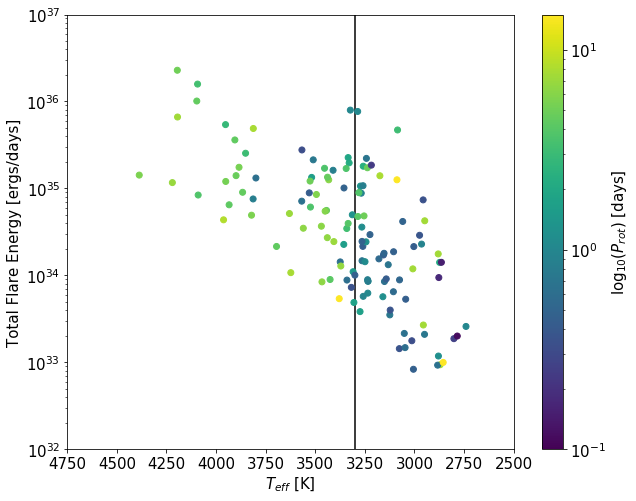

In [9]:
%matplotlib inline
plt.rcParams['font.size'] = 15
plt.figure(figsize=(10,8))

plt.scatter(b_teff, b_tot_e, 
            c=b_rot,
            norm=mpl.colors.LogNorm(), vmin=0.1, vmax=15)
plt.colorbar(label='log$_{10} (P_{rot})$ [days]')
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('Total Flare Energy [ergs/days]')
plt.vlines(3300, 1e20, 1e40, 'k', zorder=0)
plt.yscale('log')
plt.ylim(1e32,1e37)
plt.xlim(4750, 2500)
plt.show()
#plt.savefig('total_flares.png', bbox_inches='tight', dpi=250)

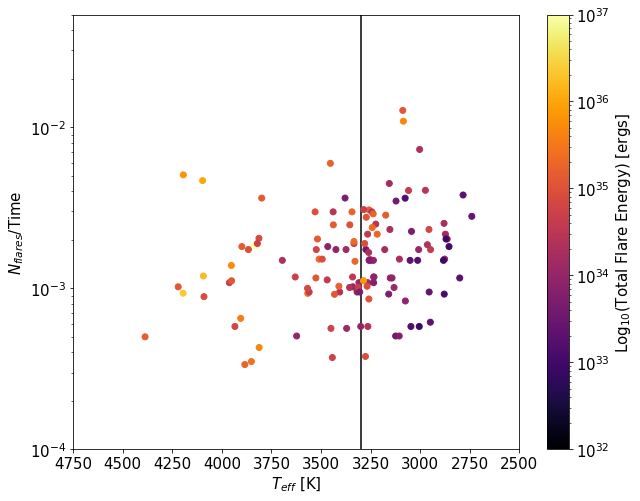

In [85]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(10,8))

#plt.scatter(teff, np.array(nflares)/np.array(cads), c='b')
plt.scatter(b_teff, np.array(b_nflares)/np.array(b_cads), 
            c=b_tot_e,
            norm=mpl.colors.LogNorm(), vmin=1e32, vmax=1e37, cmap='inferno')
plt.colorbar(label='Log$_{10}$(Total Flare Energy) [ergs]')
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('$N_{flares}$/Time')
plt.vlines(3300, 0,100, 'k', zorder=0)
plt.yscale('log')
plt.ylim(0.0001,0.05)
plt.xlim(4750, 2500)
#plt.savefig('total_flares.png', bbox_inches='tight', dpi=250)
plt.show()

# Superflares

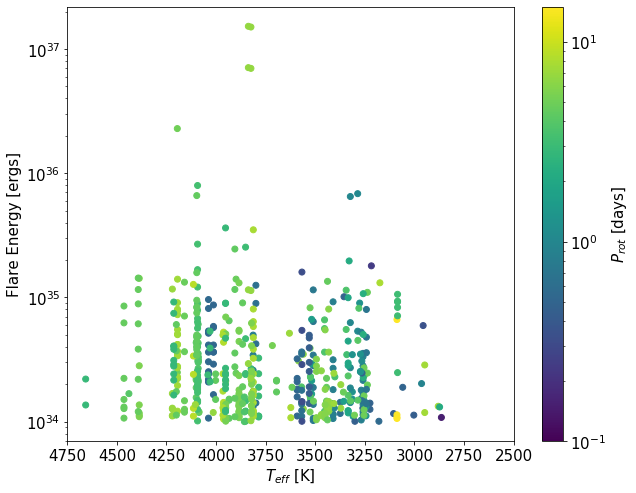

In [136]:
superflares = f[f['E_flare'] > 10**34]

plt.figure(figsize=(10,8))

n_super = []
t_super = []
c_super = []

for t in np.unique(superflares['TIC']):
    sub = superflares[superflares['TIC'] == t]
    n_super.append(len(sub))
    c_super.append(sub['cadences'].values[0])
    t_super.append(sub['Teff'].values[0])

plt.scatter(superflares['Teff'], superflares['E_flare'], c=superflares['Prot'],
            norm=mpl.colors.LogNorm(), vmin=0.1, vmax=15)
plt.colorbar(label='$P_{rot}$ [days]')
plt.yscale('log')
plt.xlim(4750, 2500)
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('Flare Energy [ergs]')
plt.show()
plt.close()

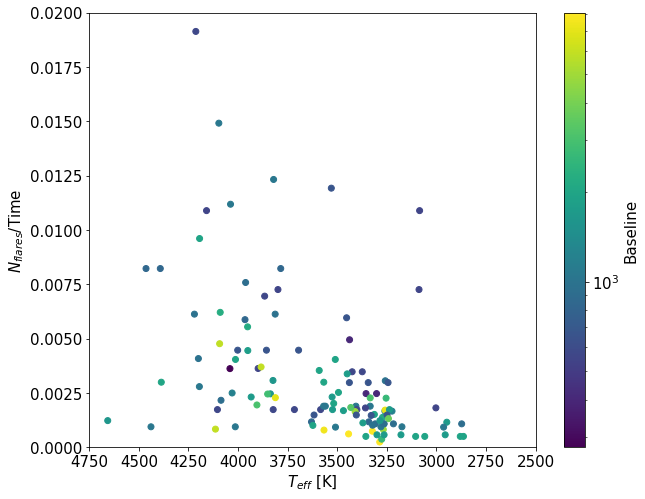

In [137]:
plt.figure(figsize=(10,8))
plt.scatter(t_super, np.array(n_super)/np.array(c_super), c=c_super,
            norm=mpl.colors.LogNorm())
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('$N_{flares}$/Time')
plt.colorbar(label='Baseline')
plt.ylim(0,0.02)
plt.xlim(4750, 2500);

In [139]:
len(t_super)

123

# 80 Flares? 4 realz?

In [11]:
tics = np.unique(f['TIC'])
thebiggest = np.where(np.array(nflares) > 80)[0]

# GP Modeling

In [4]:
ys = YoungStars(fn=groups[10], fn_dir=directory)

/Users/AdinaFeinstein/Documents/young_stars/stella/stella/flare_business.py:74: ResourceWarning: unclosed file <_io.FileIO name='/Users/AdinaFeinstein/Documents/young_stars/hlsp_eleanor_tess_ffi_tic11614485_s03_tess_v0.2.0_lc.fits' mode='rb' closefd=True>
  self.star = eleanor.Source(fn=self.file, fn_dir=self.directory)


In [5]:
ys.savitsky_golay()
ys.identify_flares(method="savitsky-golay", N1=3, N2=1, N3=1)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


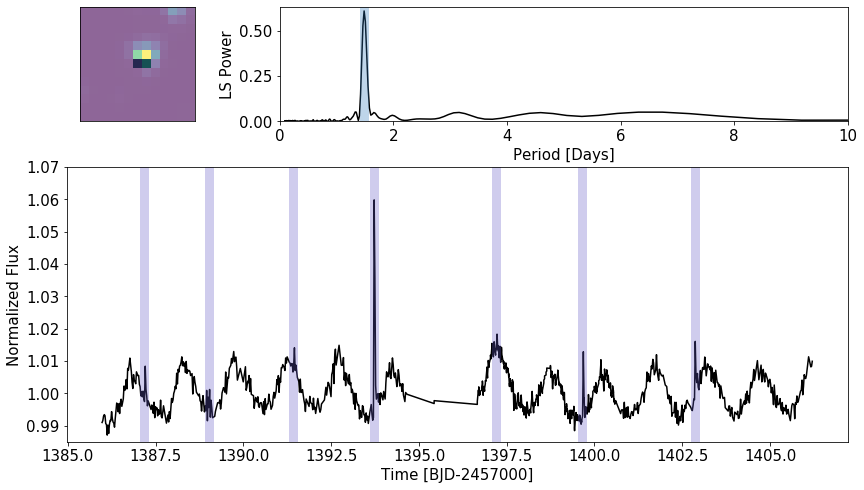

In [21]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(14,8))

gs  = gridspec.GridSpec(3,4)

ax1 = plt.subplot(gs[1:,0:])
ax1.plot(ys.time, ys.norm_flux, 'k')
ax1.set_xlabel('Time [BJD-2457000]')
ax1.set_ylabel('Normalized Flux')

mid_flare = (ys.flares.tstart+ys.flares.tstop)/2.0 - 0.04
y = np.linspace(0,2,10)
for i in range(len(mid_flare)):
    x = np.full(len(y), mid_flare[i])
    ax1.plot(x, y, c='xkcd:iris', linewidth=9, alpha=0.3)
ax1.set_ylim(0.985, 1.07)


ax3 = plt.subplot(gs[0, 1:])
ax3.plot(ys.LS_period, ys.LS_power, 'k')
ax3.plot(np.full(len(y), ys.p_rot), y, linewidth=9, alpha=0.3, c='xkcd:bluish')
ax3.set_ylim(0,0.63)
ax3.set_xlim(0,10)
ax3.set_xlabel('Period [Days]')
ax3.set_ylabel('LS Power')

ax2 = plt.subplot(gs[0, 0:1])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(ys.data.tpf[0], origin='lower')
ax2.imshow(ys.data.aperture, origin='lower', cmap='Greys', alpha=0.4)



plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.savefig('tasc5.png', dpi=300, bbox_inches='tight')